In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kf_book.mkf_internal as mkf_internal

## Hidden Variables
Let's say we are tracking an aircraft and we get the following data for the $x$ and $y$ coordinates at time $t$=1, 2, and 3 seconds. What does your intuition tell you the value of $x$ will be at time $t$=4 seconds?

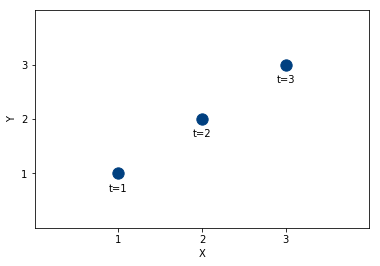

In [2]:
mkf_internal.show_position_chart()

It appears that the aircraft is flying in a straight line and we know that aircraft cannot turn on a dime. The most reasonable guess is that at $t$=4 the aircraft is at (4,4). I will depict that with a green arrow.

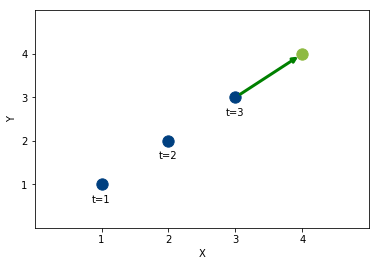

In [3]:
mkf_internal.show_position_prediction_chart()

You made this inference because you **inferred** a constant velocity for the airplane. The reasonable assumption is that the aircraft is moving one unit each in x and y per time step.

Think back to the **g-h Filter** chapter when we were trying to improve the weight predictions of a noisy scale. We incorporated **weight gain** into the equations because it allowed us to make a better prediction of the weight the next day. The g-h filter uses the $g$ parameter to scale the amount of significance given to the current weight measurement, and the $h$ parameter scaled the amount of significance given to the weight gain.

We are going to do the same thing with our Kalman filter. After all, the Kalman filter is a form of a g-h filter. In this case we are tracking an airplane, so instead of weight and weight gain we need to track position and velocity. Weight gain is the derivative of weight, and of course velocity is the derivative of position. It's impossible to plot and understand the 4D chart that would be needed to plot x and y and their respective velocities so let's do it for $x$, knowing that the math generalizes to more dimensions.

At time 1 we might be fairly certain about the position (x=0) but have no idea about the velocity. We can plot that with a covariance matrix like this. The narrow width expresses our relative certainty about position, and the tall height expresses our lack of knowledge about velocity.

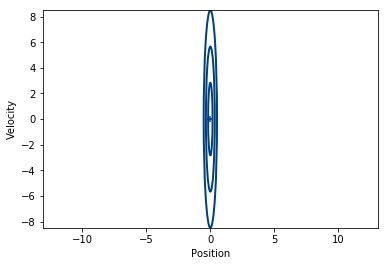

In [4]:
mkf_internal.show_x_error_chart(1)

Now after one second we get a position update of x=5.

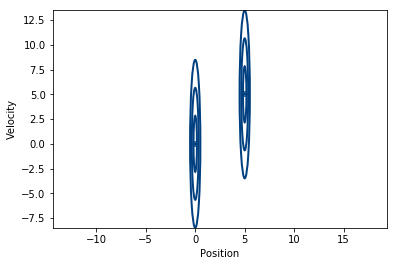

In [5]:
mkf_internal.show_x_error_chart(2)

This implies that our velocity is roughly 5 m/s. But of course position and velocity are correlated. If the velocity is 5 m/s the position would be 5, but if the velocity was 10 m/s the position would be 10. So let's draw a covariance matrix in red showing the relationship between the position and velocity.

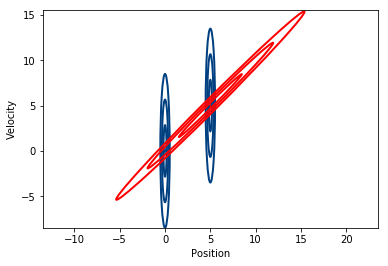

In [6]:
mkf_internal.show_x_error_chart(3)

We have no easy way to say where the object really is because we are so uncertain about the velocity. Hence the ellipse stretches very far in the x-axis. Our uncertainty in velocity of course means it is also very spread in the y-axis. Position is correlated to velocity. If the velocity is 5 m/s the next position would be 5, and if the velocity is 10 the next position would be 10. They are very correlated, so the ellipse must be very narrow.

This superposition of the two covariances is where the magic happens. The only reasonable estimate at time $t=1$ (where position=5) is roughly the intersection between the two covariance matrices! More exactly, we can use the math and multiply the two covariances together. 

From a Bayesian point of view we multiply the prior with the probability of the evidence (the likelihood) to get the posterior. If we multiply the position covariance with the velocity covariance using the Bayesian equations we get this result:

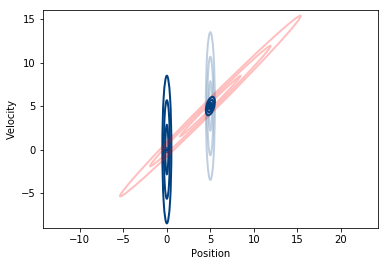

In [7]:
mkf_internal.show_x_error_chart(4)


The new covariance (the posterior) lies at the intersection of the position covariance and the velocity covariance. It is slightly tilted, showing that there is some correlation between the position and velocity. Far more importantly, it is much smaller than either the position or velocity covariances. In the previous chapter our variance would get smaller each time we performed an update() because the previous estimate was multiplied by the new measurement. The same happens here. However, here the improvement is markedly better. This is because we are using two different pieces of information which are nevertheless correlated. Knowing the velocity approximately and their correlation and the position approximately allows us to make a very accurate estimate.

This is a key point, so read carefully! The radar is only detecting the position of the aircraft. This is called an **observed variable**. Based on the position estimates we can compute velocity. We call the velocity a **hidden variable**. Hidden means what it sounds like - there is no sensor that is measuring velocity, thus its value is hidden from us. We are able to use the correlation between position and velocity to infer its value very accurately.

To round out the terminology there are also **unobserved variables**. For example, the aircraft's state includes things such as as heading, engine RPM, weight, color, the first name of the pilot, and so on. We cannot sense these directly using the position sensor so they are not observed. There is no way to infer them from the sensor measurements and correlations (red planes don't go faster than white planes), so they are not hidden. Instead, they are **unobservable**. If you include an unobserved variable in your filter state the estimate for that variable will be nonsense.

What makes this possible? Imagine for a moment that we superimposed the velocity from a different airplane over the position graph. Clearly the two are not related, and there is no way that combining the two could possibly yield any additional information. In contrast, the velocity of this airplane tells us something very important - the direction and speed of travel. So long as the aircraft does not alter its velocity the velocity allows us to predict where the next position is. After a relatively small amount of error in velocity the probability that it is a good match with the position is very small. Think about it - if you suddenly change direction your position is also going to change a lot. If the measurement of the position is not in the direction of the velocity change it is very unlikely to be true. The two are correlated, so if the velocity changes so must the position, and in a predictable way.

It is important to understand that we are taking advantage of the fact that velocity and position are correlated. We get a rough estimate of velocity from the distance and time between two measurements, and use Bayes theorem to produce very accurate estimates after only a few observations. Please reread this section if you have any doubts. If you do not understand this you will quickly find it impossible to reason about what you will learn in the following chapters.